### Evaluating a models preformance 
In practice the typical workflow you will go through when building a model is:
```
Build a model: fit it -> evaluate it -> tweak it -> repeat...
```

- When building model we want to experiment with the best fit
- When evaluating models you want to visualize

Its a good idea to viualize:

- The Data: what data are you working with?
- The Model: What does the model look like?
- The Training: how does the model perform while learning?
- The Predictions: how do the perdictions line up against the original labels?

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [3]:
# Create a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [4]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

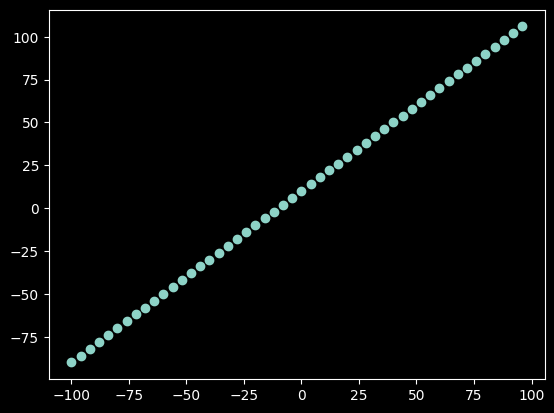

In [5]:
plt.scatter(X, y)

### The 3 Sets

* **Training Set**: the model that learns from the data, which is typically 70%-80% of the data available

* **Validation set**: the model gets tuned on this data, which is typically 10%-15% of the data available

* **Test set**: the model gets evaluated on this data to test what it has learned, this set is typically 10%-15% of the total data available

In [6]:
# Check the amount of sample we have
len(X)

50

In [7]:
# Split the Data into train and test sets
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]
len(X_train), len(X_test)

(40, 10)

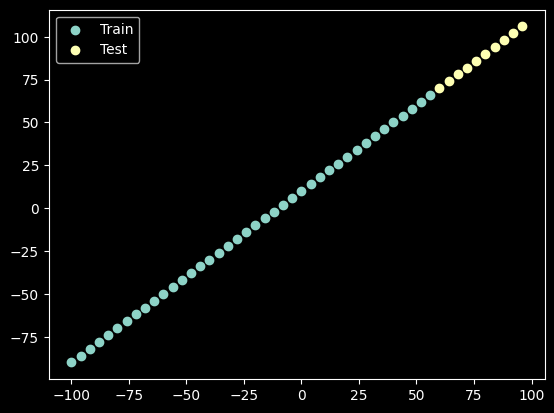

In [8]:
# Visualize the split data
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.legend(["Train", "Test"])

### Vizualizing the model

In [9]:
# Create a model which builds automatically by defining the input_shape
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
])

#Compile the model
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.mae,
    metrics=["mae"]
)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* **Total params**: total number of parameters in the model
* **Trainable params**: the parameters the model can update as it trains
* **Non-trainable params**: aren't updated during training. This is typical when bringing in already learned parameters from other models during ***transfer learning***

In [11]:
# fit the model
model.fit(
    X_train,
    y_train,
    epochs=100,
    verbose=0
)

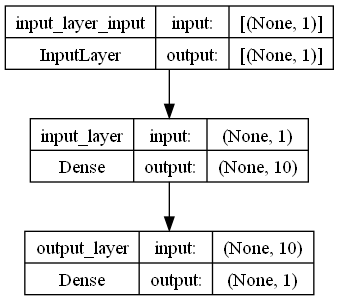

In [12]:
# Visualize the Neural Network Layers
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing model predictions

to visualize predictions, it's a good idea to plot them against the ground truth labels

In [13]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 48ms/step


array([[ 88.58427 ],
       [ 94.36473 ],
       [100.145195],
       [105.925644],
       [111.70611 ],
       [117.48658 ],
       [123.26703 ],
       [129.04749 ],
       [134.82796 ],
       [140.6084  ]], dtype=float32)

In [14]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [15]:
# Create a plotting function
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred):
    """Plots training data, test data, and compares predictions."""
    plt.figure(figsize=(10, 7))
    # Plot training data
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot test data
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot predictions
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    plt.legend()

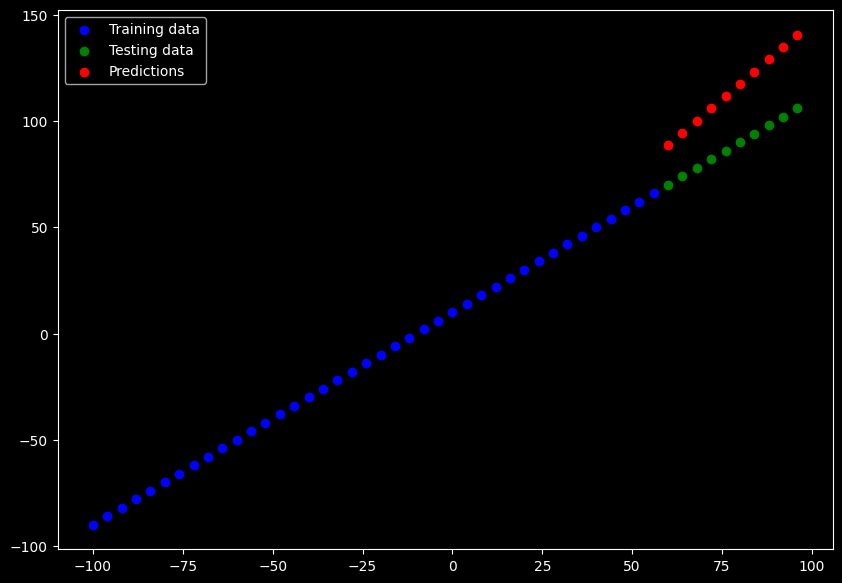

In [16]:
plot_predictions()

### Evaluating model predictions with regression evaluation metrics

Depending on the problem your working on there will be different evaluation metric to evaluate your models performance
#### Regression Metrics
- **Mean Absolute Error**: A great starter metric for to any regression
$$ MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$
- **Mean Squared Error**: Used when larger error are more significaant than smaller errors
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$
- **Huber Loss Function**: Combination of MSE and MAE. Less sensitive to outliers than MSE
$$L_{\delta}=
    \left\{\begin{matrix}
        \frac{1}{2}(y - \hat{y})^{2} & if \left | (y - \hat{y})  \right | < \delta\\
        \delta ((y - \hat{y}) - \frac1 2 \delta) & otherwise
    \end{matrix}\right.$$

In [17]:
# Evaluate model on a test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 78ms/step - loss: 26.5963 - mae: 26.5963


[26.596338272094727, 26.596338272094727]

In [18]:
# Calculate MAE
mae = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae.numpy()

26.596338

In [19]:
# Calulate MSE
mse = tf.keras.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse.numpy()

733.51807

In [20]:
# Calucate Huber loss
huber = tf.keras.losses.huber(y_test, tf.squeeze(y_pred))
huber.numpy()

26.096338

In [21]:
def get_metrics(y_true=y_test, y_pred=y_pred):
    return {
        "mae": tf.keras.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred)).numpy(),
        "mse": tf.keras.metrics.mean_squared_error(y_true, tf.squeeze(y_pred)).numpy(),
        "huber": tf.keras.losses.huber(y_true, tf.squeeze(y_pred)).numpy()
    }

In [22]:
get_metrics(y_test, y_pred)

{'mae': 26.596338, 'mse': 733.51807, 'huber': 26.096338}

## Modeling Experiments

Running experiments to improve the model
```
fit it -> evaluate it -> TWEAK IT -> repeat
```

### How to begin model Improvement
- **Get More data**: get more examples for the model to train on
    - more oportunities to learn patterns or relationships
- **Make your model larger**: use more complex models 
    - more layers and hidden units in each layer
- **Train for longer**: give your model more of a chance to find patterns

In [23]:
# Set Random seed 
tf.random.set_seed(42)

# Create the Original model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])
model_1.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.mae,
    metrics=["mae"]
)
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100


2/2 [==============================] - 0s 4ms/step - loss: 11.9771 - mae: 11.9771
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 9.2945 - mae: 9.2945
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 11.6090 - mae: 11.6090
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 9.3758 - mae: 9.3758
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 10.2566 - mae: 10.2566
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 9.5082 - mae: 9.5082
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 8.6351 - mae: 8.6351
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 9.0473 - mae: 9.0473
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 18.9183 - mae: 18.9183
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 10.2052 - mae: 10.2052
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss: 8.4320 - 

1/1 [==============================] - 0s 28ms/step


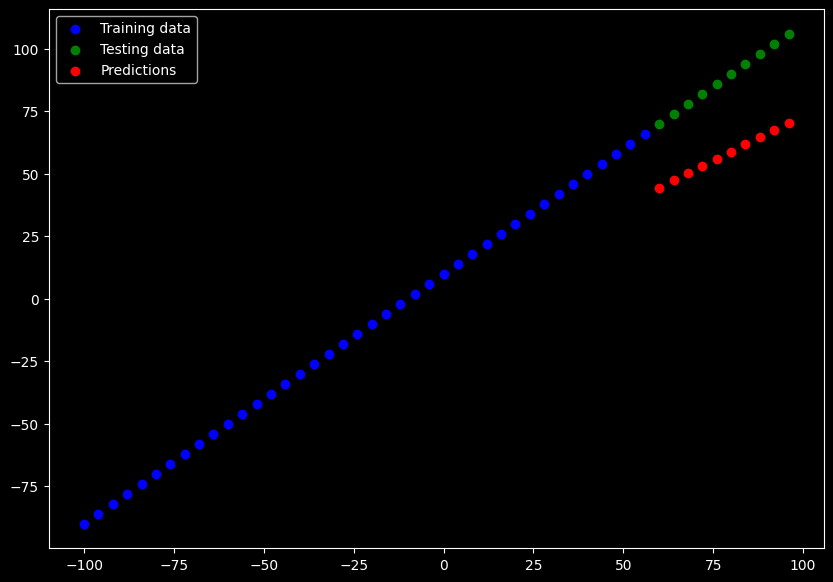

In [24]:
# Make a plot prediction for model_1
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [25]:
# Calulate model_1 Evaluation Metrics
get_metrics(y_test, y_pred_1)

{'mae': 30.583033, 'mse': 945.7197, 'huber': 30.083033}

In [26]:
# Create a model with additional layers
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1),
])
model_2.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.mae,
    metrics=["mae"]
)
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 21.9855 - mae: 21.9855
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 7.9144 - mae: 7.9144
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 16.7754 - mae: 16.7754
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 10.4597 - mae: 10.4597
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 13.0178 - mae: 13.0178
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 10.3029 - mae: 10.3029
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 12.2281 - mae: 12.2281
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 12.0354 - mae: 12.0354
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 28.9065 - mae: 28.9065
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 19.0790 - mae: 19.0790
Epoch 11/100
2/2 [==============================] - 0s 2ms/st

1/1 [==============================] - 0s 30ms/step


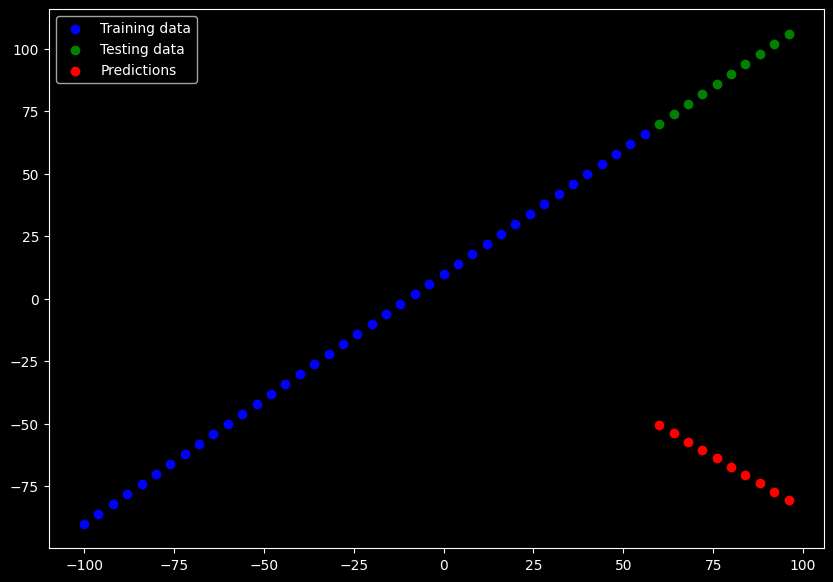

In [27]:
# Plot model_2 predictions
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [28]:
# Get Model 2 Evaluation Metrics
get_metrics(y_test, y_pred_2)

{'mae': 153.49223, 'mse': 24006.594, 'huber': 152.99223}

In [29]:
# Build a model with more training
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])
model_3.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.mae,
    metrics=["mae"]
)
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 4ms/step - loss: 57.6344 - mae: 57.6344
Epoch 2/500
2/2 [==============================] - 0s 2ms/step - loss: 10.1635 - mae: 10.1635
Epoch 3/500
2/2 [==============================] - 0s 2ms/step - loss: 22.7660 - mae: 22.7660
Epoch 4/500
2/2 [==============================] - 0s 2ms/step - loss: 12.0263 - mae: 12.0263
Epoch 5/500
2/2 [==============================] - 0s 2ms/step - loss: 13.0836 - mae: 13.0836
Epoch 6/500
2/2 [==============================] - 0s 2ms/step - loss: 10.5723 - mae: 10.5723
Epoch 7/500
2/2 [==============================] - 0s 2ms/step - loss: 11.5063 - mae: 11.5063
Epoch 8/500
2/2 [==============================] - 0s 2ms/step - loss: 11.1750 - mae: 11.1750
Epoch 9/500
2/2 [==============================] - 0s 2ms/step - loss: 41.5868 - mae: 41.5868
Epoch 10/500
2/2 [==============================] - 0s 2ms/step - loss: 28.8345 - mae: 28.8345
Epoch 11/500
2/2 [==============================] - 0s 2ms/

1/1 [==============================] - 0s 31ms/step


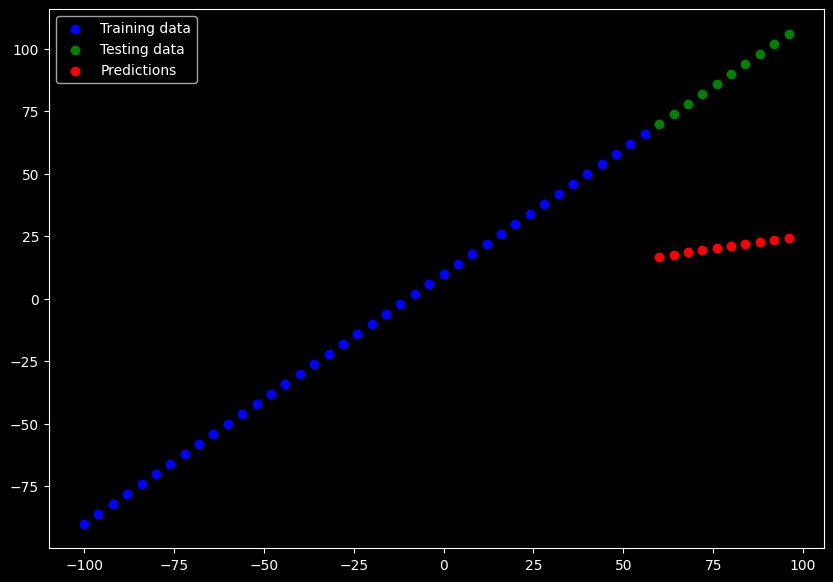

In [30]:
Y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=Y_pred_3)

In [31]:
# Prime Example overfitting
get_metrics(y_test, Y_pred_3)

{'mae': 67.40903, 'mse': 4627.015, 'huber': 66.90903}

### Comparing the results of experiments
**Note**: Start with small experiments and then increase their scale as needed

In [33]:
import pandas as pd

model_results = [["model_1"] + [value for key, value in get_metrics(y_test, y_pred_1).items()], 
                 ["model_2"] + [value for key, value in get_metrics(y_test, y_pred_2).items()], 
                 ["model_3"] + [value for key, value in get_metrics(y_test, Y_pred_3).items()]]

all_results = pd.DataFrame(model_results, columns=["Model", "MAE", "MSE", "Huber"])
all_results

,Model,MAE,MSE,Huber
0,model_1,30.583033,945.719727,30.083033
1,model_2,153.492233,24006.593750,152.992233
2,model_3,67.409027,4627.015137,66.909027


### Saving and Using a model